# Text Summarization in Python

## Motivation: 
The length of textual data is increasing and people have less time. Often the newspaper articles run into a long text of, say 1000 -1200 words. As wearable devices leap to prominence (Google Glass, Apple Watch, to name a few), content must adapt to the limited screen space available on these devices.
The task of generating intelligent and accurate summaries for long pieces of text has become a popular research as well as industry problem.

## Approach: 
Extractive text summarization is all about finding the more important sentences from a document as a summary of that document.
Our approach is using the TextRank algorithm to find these 'important' sentences.

## Implementation

### 1. Importing important libraries

In [1]:
# numpy library helps in working with arrays: array creation and manipulation
# this implementation uses array for storing the matrices generated as 2-D arrays
# PyPDF2 is a library used for reading the PDF files
# docx2txt is the library used for reading Word documents 
# sys library has been used for printing the size of data structures used in the program
!pip install PyPDF2
!pip install docx2txt
import numpy as np
import PyPDF2
import docx2txt
import sys

     |████████████████████████████████| 81kB 1.4MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=64d1401df220ccb2d178f42b9b69f21ed57f4dd14c5d0a58ae00122d11e36089
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3963 sha256=ccfe5b594996d55331181340da8b44f0160d8e517dd110f143f1a28e0a1b0b0c
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


In [0]:
# matplotlib is a library that is used to visualize the data by drawing graphs of matrix inputs
# we will use it for drawing the matrices generated later in the program 
# %matplotlib inline is a command used to show the graphs in the jupyter notebook

import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
# networkx library helps in working with graphs ...
# and later performing the PageRank algorithm ...
# which is the crux of this implementation to find ...
# the importance of each sentence using their 'rank' as a metric ...
# rank, the output of the method textrank, is a measure of importance of sentences
# this library has been used in the cell no. ()

import networkx as nx

In [0]:
# the PunktSentenceTokenizer library is being imported from the file punkt.py contained in package nltk.tokenize 
# this is used to tokenize the document into sentences

# Tokenization: Tokenization is the process of demarcating and possibly classifying.. 
# sections of a string of input characters. 
# The resulting tokens are then passed on to some other form of processing. 

from nltk.tokenize.punkt import PunktSentenceTokenizer

In [0]:
# TfidfTransformer and CountVectorizer libraries are being imported

# CountVectorizer: In this implementation, a CountVectorizer object is being created that ..
# will be used for creating the document-term matrix

# tFidTransformer: In this implementation,TfidfTransformer is used for executing the method fit_transform()... 
# which provides the output as a document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### 2.  Function to read the document from user
Supported formats: .txt, .pdf 

Input: Takes the name of the file as input. 

Output: Returns a string output containing the contents of the file.

In [7]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document
readDoc()

Please input a file name: b.txt
You have asked for the document b.txt
1
<class 'str'>


'See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/317420253\nA survey on extractive text summarization\nConference Paper · January 2017\nDOI: 10.1109/ICCCSP.2017.7944061\nCITATIONS\n26\nREADS\n3,140\n2 authors:\nSome of the authors of this publication are also working on these related projects:\nhuman action recognition View project\nHuman Activity Recognition View project\nN. Moratanch\nAnna University, Chennai\n4 PUBLICATIONS 51 CITATIONS\nSEE PROFILE\nChitrakala Gopalan\nAnna University, Chennai\n115 PUBLICATIONS 211 CITATIONS\nSEE PROFILE\nAll content following this page was uploaded by N. Moratanch on 07 November 2017.\nThe user has requested enhancement of the downloaded file.\nIEEE International Conference on Computer, Communication, and Signal Processing (ICCCSP-2017)\nA Survey on Extractive Text Summarization\nN.Moratanch* ,S.Chitrakala t\n*Research Scholar, t Associate Professor\n*tDepartment of CSE\nAnna University

### 3. Function to tokenize the document
Input: String of text document

Output: A list containing sentences as its elements

In [0]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### 4. Read the document

In [10]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: b.txt
You have asked for the document b.txt
1
<class 'str'>
The length of the file is: 31576


### 5. Generate a list of sentences in the document

In [11]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 2504
The size of the item 0 in Bytes is: 744


In [12]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [13]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 266


In [14]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/317420253
A survey on extractive text summarization
Conference Paper · January 2017
DOI: 10.1109/ICCCSP.2017.7944061
CITATIONS
26
READS
3,140
2 authors:
Some of the authors of this publication are also working on these related projects:
human action recognition View project
Human Activity Recognition View project
N. Moratanch
Anna University, Chennai
4 PUBLICATIONS 51 CITATIONS
SEE PROFILE
Chitrakala Gopalan
Anna University, Chennai
115 PUBLICATIONS 211 CITATIONS
SEE PROFILE
All content following this page was uploaded by N. Moratanch on 07 November 2017.
The user has requested enhancement of the downloaded file.
IEEE International Conference on Computer, Communication, and Signal Processing (ICCCSP-2017)
A Survey on Extractive Text Summarization
N.Moratanch* ,S.Chitrakala t
*Research Scholar, t Associate Professor
*tDepartment of CSE
Anna University,CEG,Chennai
* tancyanbil@ g

### 6. Generate term-document matrix (TD matrix) of the data 

In [0]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

**So what does CountVectorizer.fit_transform() do?**

In [16]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am', 'are', 'ashish', 'bad', 'good', 'is', 'not', 'you']


In [17]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <266x1284 sparse matrix of type '<class 'numpy.int64'>'
	with 3878 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['00', '02', '07', '09', '0906', '10', '11', '1109', '115', '12', '1290', '1293', '13', '14', '140', '142', '146', '15', '16', '17', '18', '19', '1998', '1999', '20', '2001', '2002', '2004', '2005', '2007', '2008', '2009', '2010', '2011', '2014', '2015', '2016', '2017', '205', '21', '211', '215', '22', '23', '24th', '25', '258', '26', '268', '2862', '2867', '299', '305', '31', '317420253', '347', '352', '37', '3716', '405', '417', '443', '448', '457', '46', '461', '4690', '479', '489', '49', '493', '50', '5090', '51', '52', '604', '632', '7944061', '978', 'able', 'abounding', 'about', 'abstract', 'abstractive', 'ac', 'accomplishes', 'accuracy', 'achieved', 'acl', 'acm', 'action', 'activity', 'adhesive', 'adjectives', 'adoptin

In [18]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.09391521 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <1284x266 sparse matrix of type '<class 'numpy.float64'>'
	with 3878 stored elements in Compressed Sparse Column format>>


Number of edges 16882
Number of vertices 266


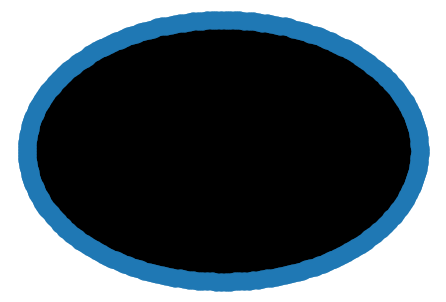

The memory used by the graph in Bytes is: 56


In [20]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [0]:
#  note that the graph above is dense and therefor it resembles a circle
# if a shorter document is taken, a beautiful circular graph can be seen 

### 8. Getting the rank of every sentence using textrank

In [22]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 9320
0 0.0035299969616808284
1 0.0033717558603198836
2 0.004655642837456238
3 0.004920943518324018
4 0.005906130798249928
5 0.004423774622355444
6 0.0044689056181346914
7 0.0052308125794850585
8 0.004138189569552129
9 0.004394162767172467
10 0.0036068354793937956
11 0.005409612050655677
12 0.0033213017340794977
13 0.00391684191737175
14 0.002149772294369349
15 0.004224965908712696
16 0.002975868184396672
17 0.003711313683407367
18 0.002599564266003766
19 0.0030546976135088205
20 0.005129699470647373
21 0.005346867557068253
22 0.004088511317481875
23 0.004266500449287019
24 0.003877958836369414
25 0.005724457744379733
26 0.0034240709550260374
27 0.0023925471658529183
28 0.0039893738038417215
29 0.0018524313083226602
30 0.005292873135080768
31 0.0040573761429255435
32 0.005100045500163795
33 0.004816777107578484
34 0.005353073447217089
35 0.003935541659104468
36 0.006639593760492873
37 0.0058652789688904555
38 0.0031246989607352

### 9. Finding important sentences and generating summary

In [0]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [0]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [25]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.007911754919798864
0.0005963029218843173


In [26]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


266


In [0]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [0]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [0]:
model = sentence_list

### 10. Writing the summary to a new file

In [30]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close


The normalized length of the sentence is calculated
as the ratio between a number of words in the sentence to the
number of words in the longest sentence in the document. P (s E< SII1,h,h, .... In)
represents the probability of the sentences to be included in
the summary based on the given features possessed by the
sentence. SENTENCE LEVEL FEATURES
2.1 Sentence location feature
The sentences that occur in the beginning and the conclusion
part of the document are most likely important since most
documents are hierarchically structured with important information
in the beginning and the end of the paragraphs. The probability of classification are learned from the
training data by the following Bayes rule [16]: where s represents
the set of sentences in the document and fi represents
the features used in classification stage and S represents the
set of sentences in the summary. The basic steps in concept
based summarization are: i) Retrieve concepts of a text from
IEEE International Confe

<function TextIOWrapper.close>

In [31]:
for lines in sentence_list:
    print(lines)

The normalized length of the sentence is calculated
as the ratio between a number of words in the sentence to the
number of words in the longest sentence in the document.
P (s E< SII1,h,h, .... In)
represents the probability of the sentences to be included in
the summary based on the given features possessed by the
sentence.
SENTENCE LEVEL FEATURES
2.1 Sentence location feature
The sentences that occur in the beginning and the conclusion
part of the document are most likely important since most
documents are hierarchically structured with important information
in the beginning and the end of the paragraphs.
The probability of classification are learned from the
training data by the following Bayes rule [16]: where s represents
the set of sentences in the document and fi represents
the features used in classification stage and S represents the
set of sentences in the summary.
The basic steps in concept
based summarization are: i) Retrieve concepts of a text from
IEEE International Confe

# End of the notebook

Please feel free to contribue for any improvements.